# 종속변수와 상관성이 있는 변수

'행정동내_지하철역_수' - '문화시설_수'

## #01. 패키지

In [1]:
# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings("ignore")

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# 분류 알고리즘 관련 패키지
from sklearn.neighbors import KNeighborsClassifier

# 군집을 위한 패키지
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터

In [3]:
origin = read_excel("행정동병합테스트2_최종.xlsx")
origin.head()

,시도명,시군구코드,시군구명,행정동코드,읍면동명,면적,서울시전체면적_대비_구성비,인구_수,아동인구,65세이상인구,...,사업체_수,개소_공영_민영,면수_공영_민영,행정동별_공원_산_수,하천및한강여부,사회복지시설_수,공공체육시설_수,문화시설_수,학교_수,보육시설
0,서울특별시,11110,종로구,1111051500,청운효자동,2.57,0.42,11818,612,2154,...,992,668,4592,2,0,5,10,6,8,4
1,서울특별시,11110,종로구,1111053000,사직동,1.23,0.20,9355,488,1808,...,3532,362,12605,3,0,1,8,13,2,11
2,서울특별시,11110,종로구,1111054000,삼청동,1.49,0.25,2642,108,626,...,708,343,2237,1,0,0,2,31,2,3
3,서울특별시,11110,종로구,1111055000,부암동,2.27,0.38,9536,385,1814,...,558,596,3533,1,1,4,5,5,4,3
4,서울특별시,11110,종로구,1111056000,평창동,8.87,1.47,17858,1033,3495,...,747,1617,9390,0,1,11,5,11,4,3


## #03. 데이터 살펴보기

In [4]:
origin.columns

Index(['시도명', '시군구코드', '시군구명', '행정동코드', '읍면동명', '면적', '서울시전체면적_대비_구성비', '인구_수',
       '아동인구', '65세이상인구', '장애인_인구', '인구밀도', '행정동내_지하철역_수', '행정동내_의료기관',
       '사업체_수', '개소_공영_민영', '면수_공영_민영', '행정동별_공원_산_수', '하천및한강여부', '사회복지시설_수',
       '공공체육시설_수', '문화시설_수', '학교_수', '보육시설'],
      dtype='object')

In [5]:
tmp = origin.filter(['읍면동명', '문화시설_수', '행정동내_지하철역_수'])
tmp.head()

,읍면동명,문화시설_수,행정동내_지하철역_수
0,청운효자동,6,0
1,사직동,13,2
2,삼청동,31,0
3,부암동,5,0
4,평창동,11,0


### 산점도 그래프

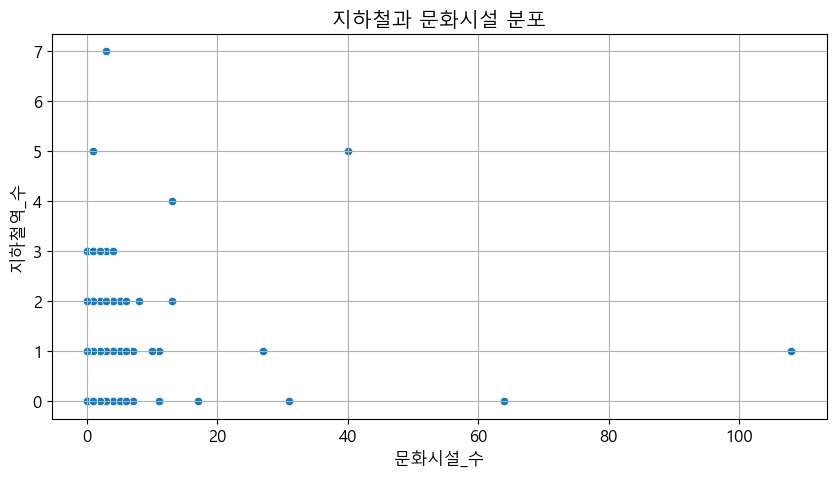

In [6]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='문화시설_수', y = '행정동내_지하철역_수')
plt.title("지하철과 문화시설 분포")
plt.xlabel('문화시설_수')
plt.ylabel("지하철역_수")

plt.grid()
plt.show()
plt.close()

## #04. 군집화 모델

### 모델 구현

In [7]:
# X = origin[['사업체_수', '행정동내_지하철역_수']].values
# X = origin.iloc[:, [origin.columns.get_loc('사업체_수'), origin.columns.get_loc('행정동내_지하철역_수')]].values

X = tmp.iloc[:,[1,2]].values
m = X.shape[0] #전체 데이터 개수
n = X.shape[1] #특징 개수(극장수, 은행 수)

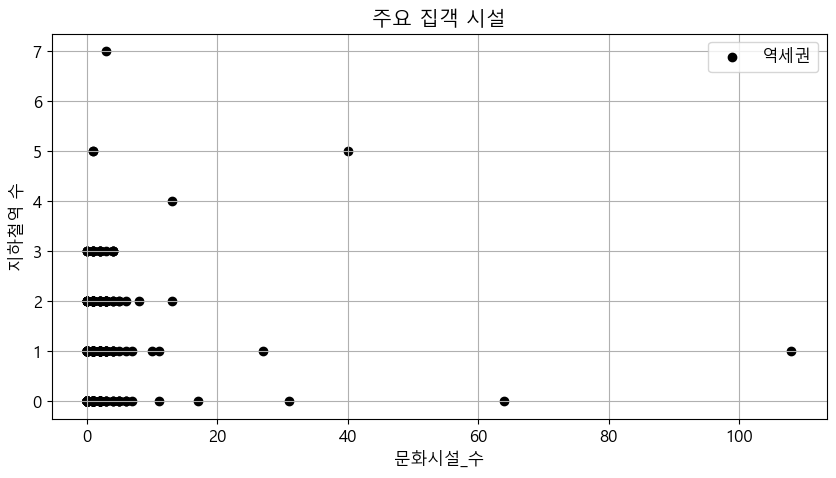

In [8]:
plt.scatter(X[:,0], X[:,1], c='black', label='역세권')
plt.xlabel('문화시설_수')
plt.ylabel('지하철역 수')
plt.legend()
plt.title('주요 집객 시설')
plt.grid()
plt.show()
plt.close()

### k값 결정

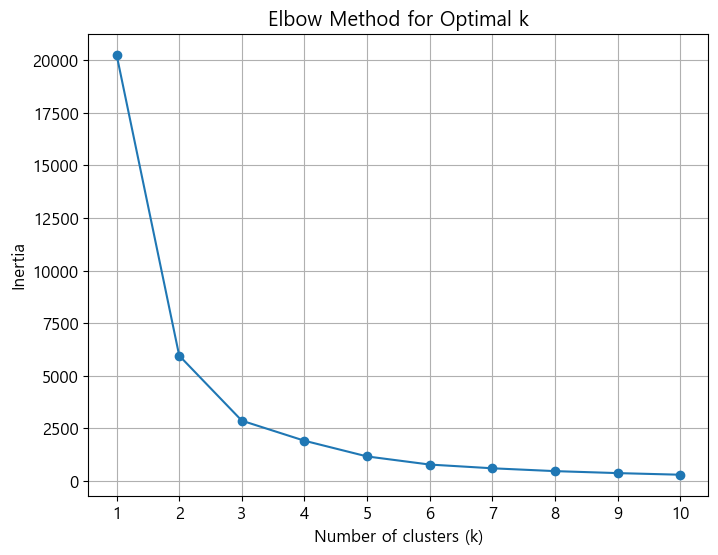

In [11]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    value = kmeans.inertia_
    inertia.append(value)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)  # 그리드 추가

# X 축의 눈금을 1 간격으로 설정
plt.xticks(range(1, 11, 1))
plt.show()
plt.close()

> 4이후로 감소폭이 크지 않으므로 k=3~5로 결정

## #05. K-means clustering

In [39]:
kmeans = KMeans(n_clusters=4).fit(X)
tmp['클러스터_수치'] = kmeans.labels_
tmp

,읍면동명,문화시설_수,행정동내_지하철역_수,클러스터_수치
0,청운효자동,6,0,0
1,사직동,13,2,0
2,삼청동,31,0,3
3,부암동,5,0,0
4,평창동,11,0,0
...,...,...,...,...
421,성내제2동,2,3,2
422,성내제3동,1,1,2
423,길동,1,1,2
424,둔촌제1동,0,1,2


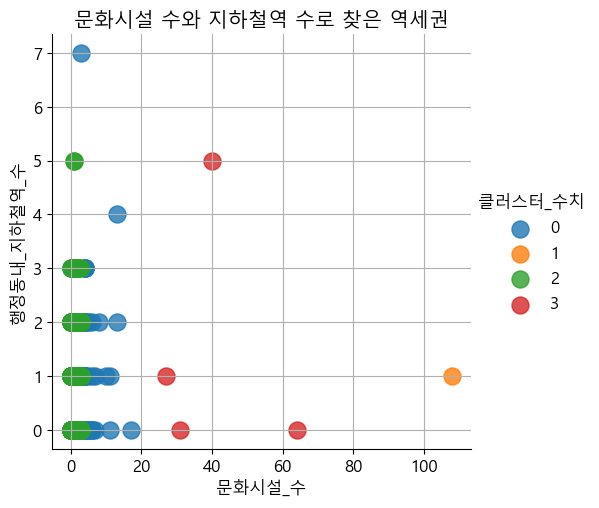

In [40]:
sb.lmplot(x='문화시설_수', y='행정동내_지하철역_수', data=tmp, fit_reg=False, scatter_kws={"s": 150}, hue="클러스터_수치")
plt.title("문화시설 수와 지하철역 수로 찾은 역세권")
plt.grid()

In [41]:
tmp[tmp['클러스터_수치']==0]

,읍면동명,문화시설_수,행정동내_지하철역_수,클러스터_수치
0,청운효자동,6,0,0
1,사직동,13,2,0
3,부암동,5,0,0
4,평창동,11,0,0
7,가회동,6,0,0
17,소공동,11,1,0
19,명동,7,1,0
21,장충동,4,1,0
24,신당동,4,3,0
34,남영동,4,3,0


In [42]:
tmp[tmp['클러스터_수치']==1]

,읍면동명,문화시설_수,행정동내_지하철역_수,클러스터_수치
10,이화동,108,1,1


In [43]:
tmp[tmp['클러스터_수치']==2]

,읍면동명,문화시설_수,행정동내_지하철역_수,클러스터_수치
5,무악동,0,0,2
6,교남동,1,0,2
9,종로5.6가동,3,2,2
12,창신제1동,1,1,2
13,창신제2동,0,1,2
...,...,...,...,...
421,성내제2동,2,3,2
422,성내제3동,1,1,2
423,길동,1,1,2
424,둔촌제1동,0,1,2


In [44]:
tmp[tmp['클러스터_수치']==3]

,읍면동명,문화시설_수,행정동내_지하철역_수,클러스터_수치
2,삼청동,31,0,3
8,종로1.2.3.4가동,40,5,3
11,혜화동,64,0,3
362,청담동,27,1,3


In [45]:
tmp[tmp['클러스터_수치']==4]

,읍면동명,문화시설_수,행정동내_지하철역_수,클러스터_수치
